In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
data_visualize = pd.read_csv("WL+WEATHER.csv")

data_visualize

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,53,208,87,36,44,0,21.9,97,-0.1
1,59,62,93,36,50,113,22.3,100,-0.1
2,60,61,93,36,56,152,22.8,100,-0.1
3,58,60,91,36,51,141,23.3,100,-0.1
4,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93,-0.1
408,39,42,42,36,44,0,13.9,99,-0.1
409,39,42,42,36,44,0,14.4,100,-0.1
410,39,42,42,36,44,0,14.6,98,-0.1


In [6]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 50000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [7]:
data = np.loadtxt("WL+WEATHER_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [8]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[ 0.00990822]
 [-0.16901165]
 [ 0.04818439]
 [-0.11050255]
 [ 0.04538764]
 [ 0.00221055]
 [ 0.02630432]
 [ 0.06838251]] 
 bias: -0.1532627 
 loss: 0.87182903 

step: 20000 
 w: 
 [[ 1.4407223e-04]
 [ 3.8096576e-03]
 [-2.0759047e-03]
 [ 1.0974385e-02]
 [-9.2971168e-04]
 [-5.8039561e-05]
 [-4.9157776e-03]
 [-1.0404092e-03]] 
 bias: -0.36088777 
 loss: 0.0069909287 

step: 30000 
 w: 
 [[ 2.2249873e-04]
 [ 3.9321142e-03]
 [-2.0551176e-03]
 [ 1.8687874e-02]
 [ 3.8947079e-03]
 [-5.0762654e-05]
 [-4.1279490e-03]
 [-6.2522484e-04]] 
 bias: -0.913362 
 loss: 0.006173329 

step: 40000 
 w: 
 [[ 2.7933417e-04]
 [ 4.0224208e-03]
 [-2.0420749e-03]
 [ 2.4546452e-02]
 [ 7.5579290e-03]
 [-4.8067515e-05]
 [-3.5320497e-03]
 [-3.1247194e-04]] 
 bias: -1.3331807 
 loss: 0.0057035876 

step: 50000 
 w: 
 [[ 3.1642991e-04]
 [ 4.0850309e-03]
 [-2.0383589e-03]
 [ 2.9005995e-02]
 [ 1.0344041e-02]
 [-5.2241332e-05]
 [-3.0840454e-03]
 [-8.0300124e-05]] 
 bias: -1.653199 
 loss: 0.0054417844 

In [9]:
y_hat = tf.matmul(x_test, w) + bias

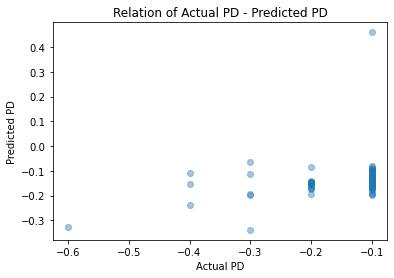

In [10]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [11]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.09150845
MAE: 0.055022877
